# Week 3 homework.

This notebook contains assignments for week 3 classifying car prices

In [93]:
## Import the modules needed for the analys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

### Download and load the data

Download the data and read it in using pandas

In [18]:
#!wget -O car_price.csv 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

--2024-09-26 15:41:02--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8003::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘car_price.csv’

car_price.csv       100%[===================>]   1.41M  8.82MB/s    in 0.2s    

2024-09-26 15:41:02 (8.82 MB/s) - ‘car_price.csv’ saved [1475504/1475504]



In [64]:
## read in the data
df = pd.read_csv('car_price.csv')

In [65]:
## get the columns needed for the analysis
column_needed = [
'Make','Model','Year', 'Engine HP','Engine Cylinders',
'Transmission Type','Vehicle Style','highway MPG','city mpg','MSRP']


In [66]:
car_price_df = df[column_needed]

In [67]:
car_price_df

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [68]:
 car_price_df.columns = car_price_df.columns.str.lower().str.replace(" ", "_")

In [69]:
car_price_df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [70]:
car_price_df.isna().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [72]:
## Replace
car_price_df = car_price_df.fillna(0)

In [73]:
car_price_df.isna().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [74]:
## Rename the columns
car_price_df.rename(columns = {'msrp':'price'}, inplace=True)

In [59]:
car_price_df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


## Question 1


What is the most frequent observation (mode) for the column transmission_type?

    AUTOMATIC
    MANUAL
    AUTOMATED_MANUAL
    DIRECT_DRIVE


In [83]:
## Get the transmission_type and use value_counts() to count the number of occurance for each. 
car_price_df['transmission_type'].value_counts()

transmission_type
AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: count, dtype: int64

In [87]:
## Can also be done using the groupby and size() method
car_price_df.groupby('transmission_type').size()

transmission_type
AUTOMATED_MANUAL     626
AUTOMATIC           8266
DIRECT_DRIVE          68
MANUAL              2935
UNKNOWN               19
dtype: int64

In [132]:
## Another way of doing the samething
car_price_df.describe(include=["O"])

,make,model,transmission_type,vehicle_style
count,11914,11914,11914,11914
unique,48,915,5,16
top,Chevrolet,Silverado 1500,AUTOMATIC,Sedan
freq,1123,156,8266,3048


## Question 2
Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

In [135]:
numeric_values = ['engine_hp', 'year', 'engine_cylinders',
'highway_mpg','city_mpg','price']

numerica_data_types = car_price_df.copy()

numerica_data_types = numerica_data_types[numeric_values]



In [139]:
numerica_data_types.describe()

,engine_hp,year,engine_cylinders,highway_mpg,city_mpg,price
count,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,247.941749,2010.384338,5.614655,26.637485,19.733255,4.059474e+04
std,110.507669,7.579740,1.800554,8.863001,8.987798,6.010910e+04
min,0.000000,1990.000000,0.000000,12.000000,7.000000,2.000000e+03
25%,170.000000,2007.000000,4.000000,22.000000,16.000000,2.100000e+04
50%,225.000000,2015.000000,6.000000,26.000000,18.000000,2.999500e+04
75%,300.000000,2016.000000,6.000000,30.000000,22.000000,4.223125e+04
max,1001.000000,2017.000000,16.000000,354.000000,137.000000,2.065902e+06


In [140]:
## Calculate the correlation
corM = numerica_data_types.corr()

corM.unstack().sort_values(ascending = False)

engine_hp         engine_hp           1.000000
year              year                1.000000
city_mpg          city_mpg            1.000000
highway_mpg       highway_mpg         1.000000
engine_cylinders  engine_cylinders    1.000000
price             price               1.000000
city_mpg          highway_mpg         0.886829
highway_mpg       city_mpg            0.886829
engine_hp         engine_cylinders    0.774851
engine_cylinders  engine_hp           0.774851
price             engine_hp           0.650095
engine_hp         price               0.650095
price             engine_cylinders    0.526274
engine_cylinders  price               0.526274
engine_hp         year                0.338714
year              engine_hp           0.338714
highway_mpg       year                0.258240
year              highway_mpg         0.258240
                  price               0.227590
price             year                0.227590
year              city_mpg            0.198171
city_mpg     

<Axes: >

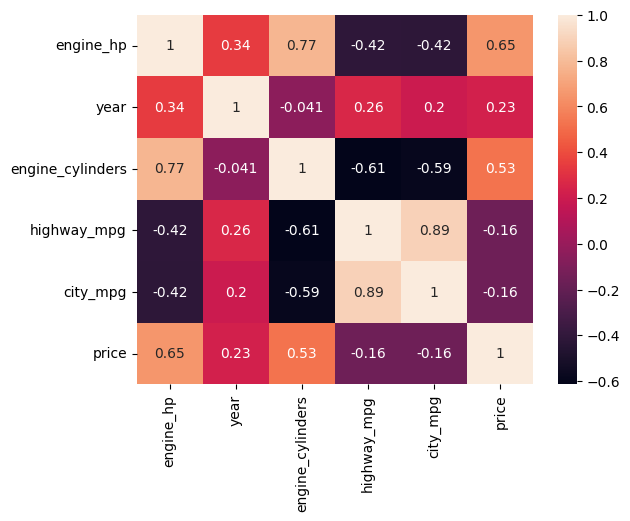

In [141]:
sns.heatmap(corM, annot=True)

#### Make price binary

In [103]:
mean_price = car_price_df.price.mean()
mean_price

40594.737032063116

In [130]:
above_average = car_price_df.price > mean_price

np.where(car_price_df['price']>=above_average,1,0)

array([1, 1, 1, ..., 1, 1, 1])

In [128]:
del car_price_df['above_average']

In [129]:
car_price_df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
